In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Importing the coffee data
df = pd.read_csv("/content/coffee_dataset.csv")
df.head(3)

,Unnamed: 0,ID,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,...,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact
0,0,0,Colombia,Finca El Paraiso,CQU2022015,Finca El Paraiso,NaN,Coffee Quality Union,1700-1930,"Piendamo,Cauca",...,89.33,11.8,0,0,green,3,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
1,1,1,Taiwan,Royal Bean Geisha Estate,"The 2022 Pacific Rim Coffee Summit,T037",Royal Bean Geisha Estate,NaN,Taiwan Coffee Laboratory,1200,Chiayi,...,87.58,10.5,0,0,blue-green,0,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
2,2,2,Laos,OKLAO coffee farms,"The 2022 Pacific Rim Coffee Summit,LA01",oklao coffee processing plant,NaN,Taiwan Coffee Laboratory,1300,Laos Borofen Plateau,...,87.42,10.4,0,0,yellowish,2,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             207 non-null    int64  
 1   ID                     207 non-null    int64  
 2   Country of Origin      207 non-null    object 
 3   Farm Name              205 non-null    object 
 4   Lot Number             206 non-null    object 
 5   Mill                   204 non-null    object 
 6   ICO Number             75 non-null     object 
 7   Company                207 non-null    object 
 8   Altitude               206 non-null    object 
 9   Region                 205 non-null    object 
 10  Producer               206 non-null    object 
 11  Number of Bags         207 non-null    int64  
 12  Bag Weight             207 non-null    object 
 13  In-Country Partner     207 non-null    object 
 14  Harvest Year           207 non-null    object 
 15  Gradin

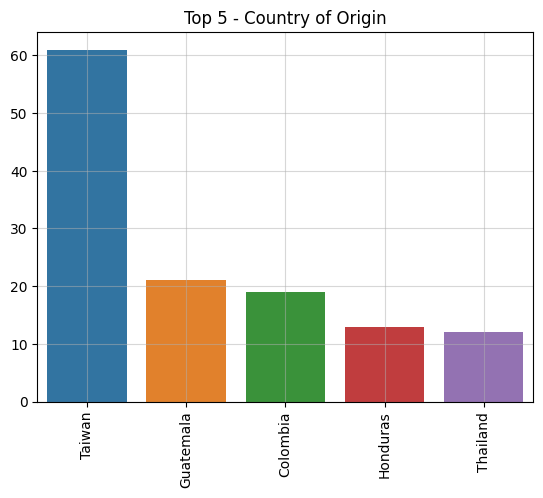

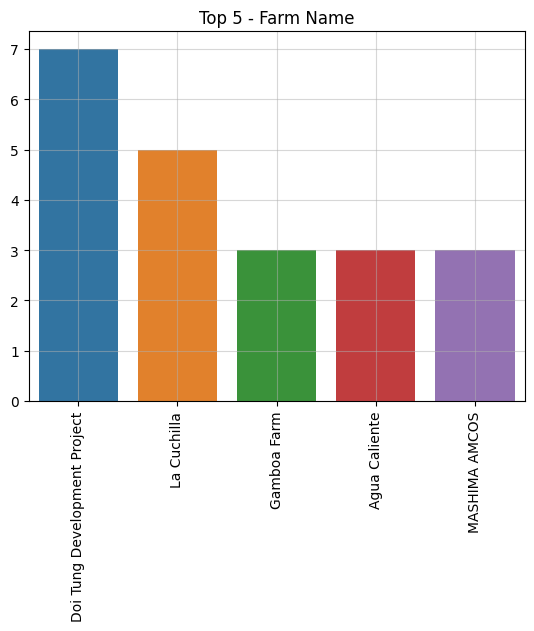

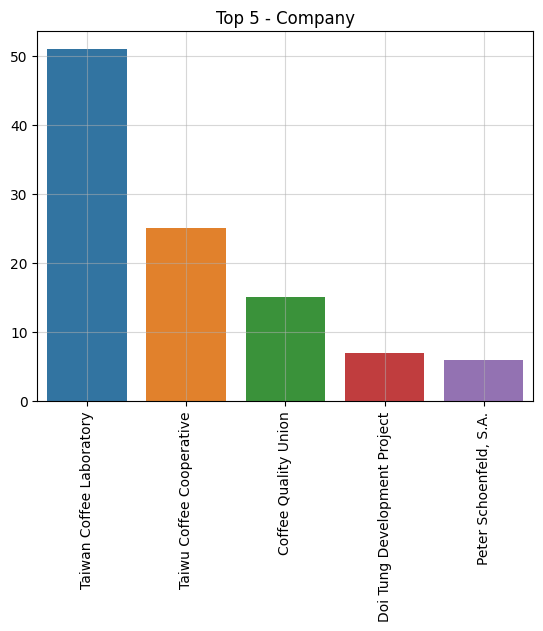

In [ ]:
# Plotting Top 5 Origin Countries, Farm Names and Companies
def plotBar(cat, n = 5):
  df_ = df[cat].value_counts()[:n]

  plt.figure()
  sns.barplot(x=df_.index, y=df_.values)
  plt.xticks(rotation = 90)
  plt.title("Top 5 - {}".format(cat))
  plt.grid(True, alpha=0.5)
  plt.show()

categories = ['Country of Origin', 'Farm Name', 'Company']
for i in categories:
  plotBar(i)

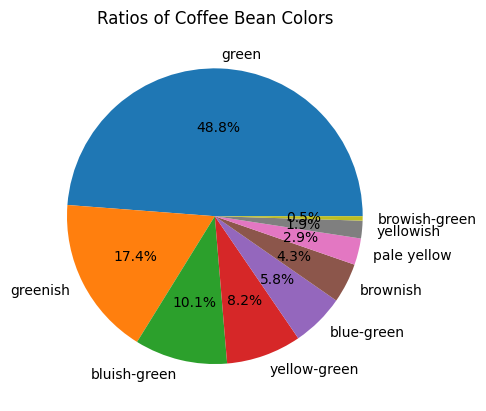

In [ ]:
plt.pie(df['Color'].value_counts().values, labels = df['Color'].value_counts().index, autopct='%1.1f%%')
plt.title('Ratios of Coffee Bean Colors')
plt.show()

In [ ]:
df['Color'].value_counts()

green            101
greenish          36
bluish-green      21
blue-green        12
yellow-green      10
brownish           9
pale yellow        6
yellow green       5
yellowish          4
yellow- green      1
browish-green      1
yello-green        1
Name: Color, dtype: int64

In [ ]:
df['Color'] = df['Color'].str.replace('yellow green','yellow-green')
df['Color'] = df['Color'].str.replace('yellow- green','yellow-green')
df['Color'] = df['Color'].str.replace('yello-green','yellow-green')

In [ ]:
df['Color'].value_counts()

green            101
greenish          36
bluish-green      21
yellow-green      17
blue-green        12
brownish           9
pale yellow        6
yellowish          4
browish-green      1
Name: Color, dtype: int64

In [ ]:
coffee_quality = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean Cup', 'Sweetness', 'Total Cup Points']

In [ ]:
df['Defects'].value_counts()

0.0    207
Name: Defects, dtype: int64

In [ ]:
coffeeQualityDF = df[coffee_quality]
coffeeQualityDF.head()

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean Cup,Sweetness,Total Cup Points
0,8.58,8.50,8.42,8.58,8.25,8.42,10.0,10.0,10.0,89.33
1,8.50,8.50,7.92,8.00,7.92,8.25,10.0,10.0,10.0,87.58
2,8.33,8.42,8.08,8.17,7.92,8.17,10.0,10.0,10.0,87.42
3,8.08,8.17,8.17,8.25,8.17,8.08,10.0,10.0,10.0,87.17
4,8.33,8.33,8.08,8.25,7.92,7.92,10.0,10.0,10.0,87.08


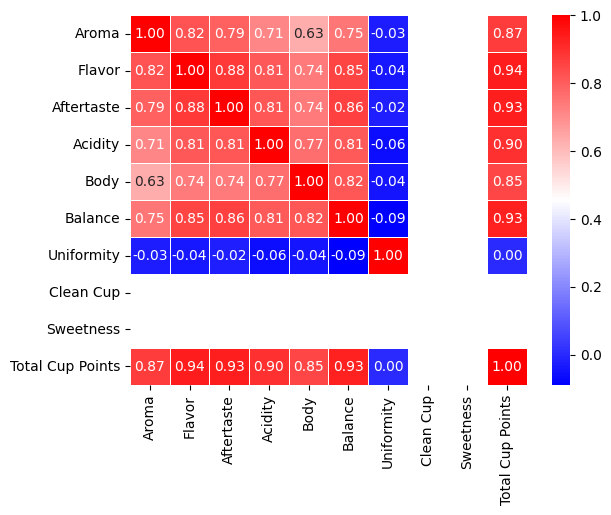

In [ ]:
sns.heatmap(coffeeQualityDF.corr(), annot=True, linewidth=0.5, fmt='.2f', cmap='bwr')
plt.show();

Since Uniformity, Clean Cup and Sweetness has no effect on Total Cup Points I removed these ones from the input data

In [ ]:
X = coffeeQualityDF[['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance']]
y = coffeeQualityDF[['Total Cup Points']]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

model.score(X_train,y_train),model.score(X_test,y_test)

(0.9910505560950857, 0.9958618208269199)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred,y_test)

0.011947225425447287